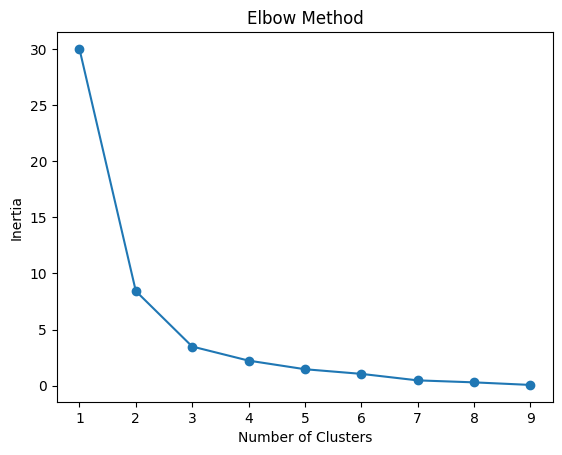

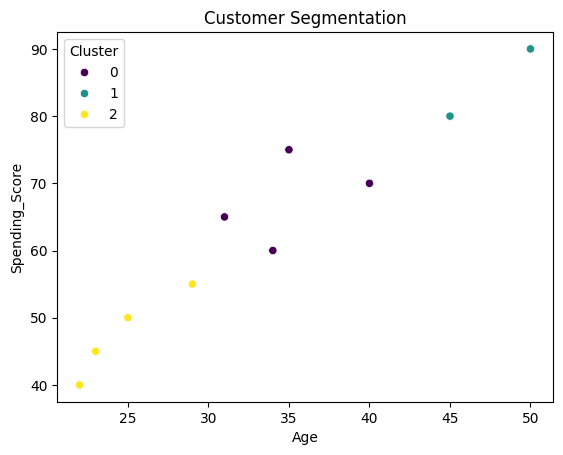

           Age  Annual_Income  Spending_Score
Cluster                                      
0        35.00        62250.0            67.5
1        47.50        85000.0            85.0
2        24.75        40000.0            47.5


In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.DataFrame({
    'Age': [25, 34, 45, 31, 29, 35, 40, 50, 22, 23],
    'Annual_Income': [40000, 60000, 80000, 52000, 45000, 62000, 75000, 90000, 37000, 38000],
    'Spending_Score': [50, 60, 80, 65, 55, 75, 70, 90, 40, 45]
})

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_data)

sns.scatterplot(x='Age', y='Spending_Score', hue='Cluster', data=data, palette='viridis')
plt.title('Customer Segmentation')
plt.show()

print(data.groupby('Cluster').mean())
